# For simulating a straight line say y = 5x+10 using random numbers between x=-10 to x=10

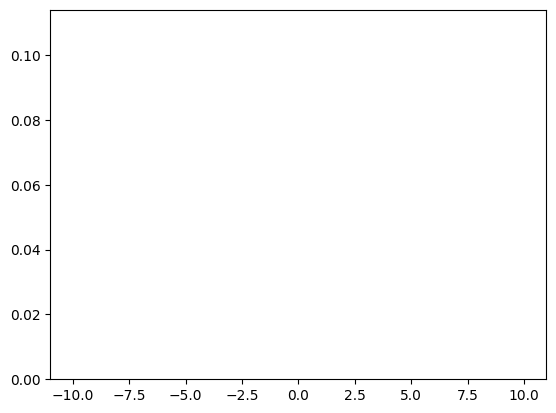

C:\Users\sutir\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


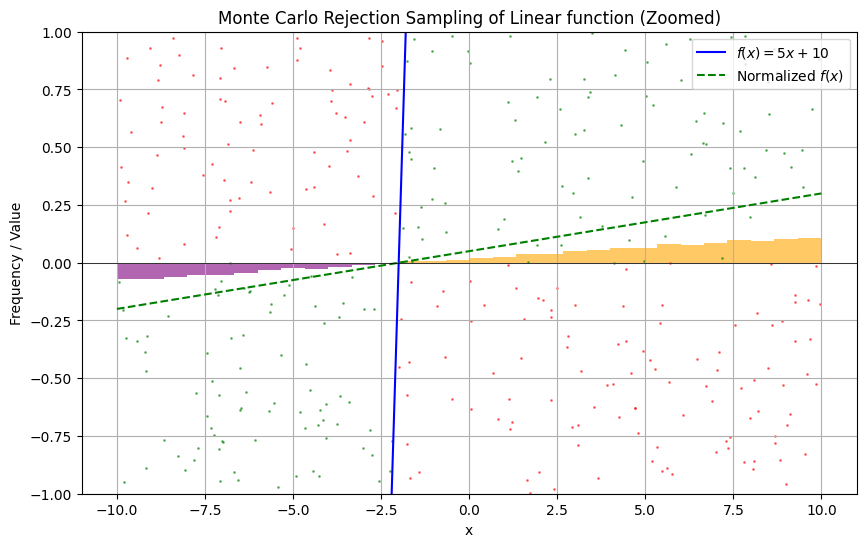

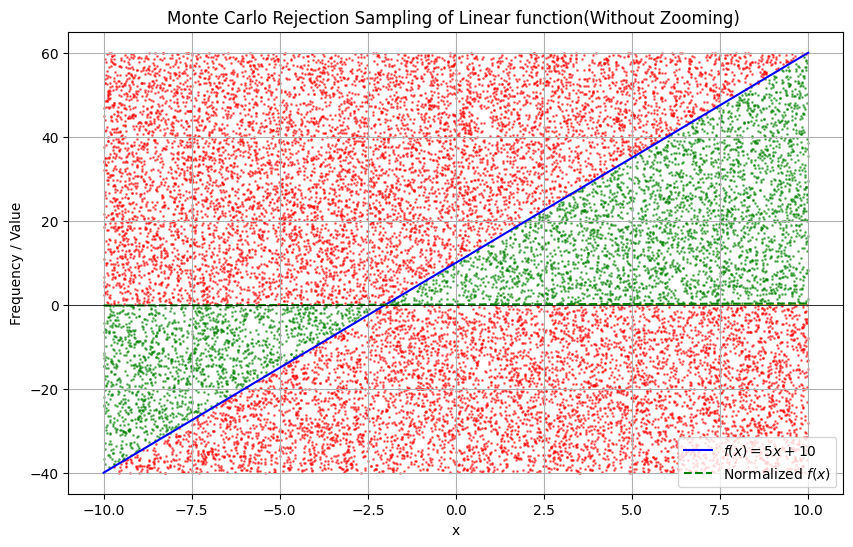

In [9]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Define the function f(x)
def f(x):
    return 5 * x + 10

# Define the range for x
a, b = -10, 10
# Define a function to compute the integral 
def integration(func, a, b, num_points=1000):
    x_values = np.linspace(a, b, num_points)
    y_values = func(x_values)
    dx = (b - a) / (num_points - 1)
    integral = np.sum((y_values[:-1] + y_values[1:]) / 2 * dx)
    return integral
integral_f = integration(f, a, b)
def normalized_f(x):
    return f(x) / integral_f if integral_f != 0 else 0

def uniform_random(low, high):
    return random.uniform(low, high)
# Monte Carlo rejection sampling method
def rejection_sampling(func, a, b, f_min, f_max, num_samples=5000):
    accepted_samples = []
    rejected_points = []
    while len(accepted_samples) < num_samples:
        x = uniform_random(a, b)       
        y = uniform_random(f_min, f_max)        
        
        if (y <= func(x) and y >= 0) or (y >= func(x) and y < 0):
            accepted_samples.append(x)
            rejected_points.append((x, y, True))  # Accepted point
        else:
            rejected_points.append((x, y, False))  # Rejected point
    return accepted_samples, rejected_points
accepted_samples, rejected_points = rejection_sampling(f, a, b, f(a), f(b))

counts, bins, _ = plt.hist(accepted_samples, bins=30, density=True, alpha=0)

reflection_point = -2.0
bin_centers = 0.5 * (bins[:-1] + bins[1:])
left_counts = counts[bin_centers < reflection_point]
left_bins = bin_centers[bin_centers < reflection_point]
right_counts = counts[bin_centers >= reflection_point]
right_bins = bin_centers[bin_centers >= reflection_point]


plt.figure(figsize=(10, 6))
plt.bar(right_bins, right_counts, width=(bins[1] - bins[0]), color='orange', alpha=0.6)
plt.bar(left_bins, -left_counts, width=(bins[1] - bins[0]), color='purple', alpha=0.6)
x_vals = np.linspace(a, b, 500)
y_vals = f(x_vals)
plt.plot(x_vals, y_vals, color='blue', label='$f(x) = 5x + 10$', linewidth=1.5)
# Plot the normalized function
normalized_y_vals = normalized_f(x_vals)
plt.plot(x_vals, normalized_y_vals, color='green', linestyle='--', label='Normalized $f(x)$', linewidth=1.5)
# Plot the accepted and rejected points
for x, y, accepted in rejected_points:
    if accepted:
        plt.scatter(x, y, color='green', s=1, alpha=0.5)
    else:
        plt.scatter(x, y, color='red', s=1, alpha=0.5)
# Add labels and title
plt.xlabel("x")
plt.ylabel("Frequency / Value")
plt.title("Monte Carlo Rejection Sampling of Linear function (Zoomed)")
plt.axhline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.ylim(-1, 1)
plt.show()


plt.figure(figsize=(10, 6))

plt.bar(right_bins, right_counts, width=(bins[1] - bins[0]), color='orange', alpha=0.6)
plt.bar(left_bins, -left_counts, width=(bins[1] - bins[0]), color='purple', alpha=0.6)
plt.plot(x_vals, y_vals, color='blue', label='$f(x) = 5x + 10$', linewidth=1.5)
# Plot the normalized function
plt.plot(x_vals, normalized_y_vals, color='green', linestyle='--', label='Normalized $f(x)$', linewidth=1.5)
# Plot the accepted and rejected points
for x, y, accepted in rejected_points:
    if accepted:
        plt.scatter(x, y, color='green', s=1, alpha=0.5)
    else:
        plt.scatter(x, y, color='red', s=1, alpha=0.5)
# Add labels and title
plt.xlabel("x")
plt.ylabel("Frequency / Value")
plt.title("Monte Carlo Rejection Sampling of Linear function(Without Zooming) ")
plt.axhline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()


# For simulating an exponential function, y = 5*exp(-x/2) between x=-10 to x=10


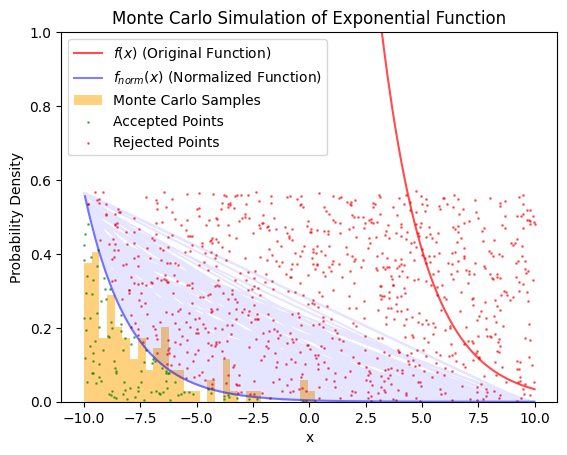

In [9]:
import random
import math
import matplotlib.pyplot as plt

N = 1000  # Number of samples

# Define the function f(x) to be simulated (e.g., an exponential function)
def f(x):
    return 5 * math.exp(-x / 2)  # Example function

# Define the range for x
a, b = -10, 10

# Function for generating random numbers between a specified range
def uniform_random(low, high):
    return random.uniform(low, high)

# Step 2: Calculate the integral (approximate with Monte Carlo integration)
def monte_carlo_integration(func, a, b, num_samples=N):
    sum_f = 0
    for _ in range(num_samples):
        x = uniform_random(a, b)
        sum_f += func(x)
    integral = (b - a) * sum_f / num_samples
    return integral

# Step 3: Normalize the function
integral = monte_carlo_integration(f, a, b)
f_max = max(f(x) / integral for x in [uniform_random(a, b) for _ in range(N)])  # Approximate f_max

def f_normalized(x):
    return f(x) / integral

# Step 4: Monte Carlo sampling using rejection sampling
def monte_carlo_sampling(func_normalized, f_max, a, b, num_samples=N):
    accepted_samples = []
    rejected_samples = []
    for _ in range(num_samples):
        x = uniform_random(a, b)
        y = uniform_random(0, f_max)
        if y <= func_normalized(x):
            accepted_samples.append((x, y))  # Store accepted points
        else:
            rejected_samples.append((x, y))  # Store rejected points
    return accepted_samples, rejected_samples

# Perform the sampling
accepted_samples, rejected_samples = monte_carlo_sampling(f_normalized, f_max, a, b)

# Generate x values for plotting the functions
x_values = [uniform_random(a, b) for _ in range(N)]
x_values.sort()  # Sort x_values for smoother plots

# Calculate corresponding y values for f(x) and normalized f(x)
y_values_f = [f(x) for x in x_values]  # Original function
y_values_f_norm = [f_normalized(x) for x in x_values]  # Normalized function

# Plot the original function f(x)
plt.plot(x_values, y_values_f, 'r-', label='$f(x)$ (Original Function)', alpha=0.7)

# Plot the normalized function f_norm(x)
plt.plot(x_values, y_values_f_norm, 'b-', label='$f_{norm}(x)$ (Normalized Function)', alpha=0.5)

# Plot histogram of sampled data to show the Monte Carlo approximation
counts, bins, _ = plt.hist([x for x, _ in accepted_samples], bins=30, density=True, alpha=0.5, color='orange', label='Monte Carlo Samples')

# Plot accepted points (those that fall under the function curve)
accepted_x, accepted_y = zip(*accepted_samples)
plt.scatter(accepted_x, accepted_y, color='green', s=1, label='Accepted Points', alpha=0.5)

# Plot rejected points (those that fall above the function curve)
rejected_x, rejected_y = zip(*rejected_samples)
plt.scatter(rejected_x, rejected_y, color='red', s=1, label='Rejected Points', alpha=0.5)

# Plot blue trace lines for multiple evaluations of f_norm(x)
trace_x_values = [uniform_random(a, b) for _ in range(N)]
trace_y_values = [f_normalized(x) for x in trace_x_values]
plt.plot(trace_x_values, trace_y_values, 'b-', alpha=0.1)  # Blue traces for f_norm(x)

# Add labels and legend
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.ylim(0,1)
plt.title("Monte Carlo Simulation of Exponential Function")
plt.legend()

plt.show()


# Testing for Gaussian Function 

Efficiency is only 4.9%


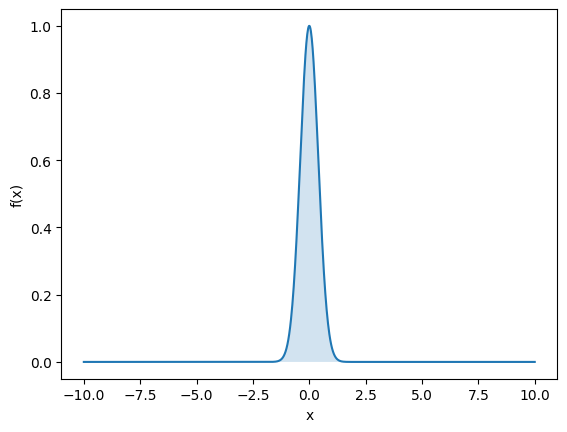

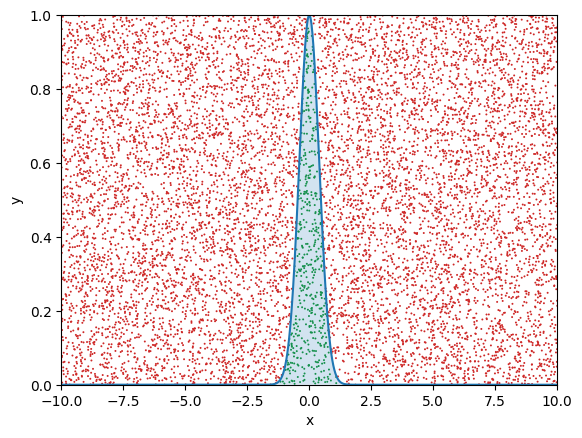

In [10]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['text.usetex'] = False
def gauss(x):
    return np.exp(-np.pi * x**2)

xs = np.linspace(-10, 10, 1000)
ys = gauss(xs)

plt.figure()
plt.plot(xs, ys)
plt.fill_between(xs, ys, 0, alpha=0.2)
plt.xlabel("x")
plt.ylabel("f(x)")
def batch_sample_2(function, num_samples, xmin=-10, xmax=10, ymax=1):
    x = np.random.uniform(low=xmin, high=xmax, size=num_samples)
    y = np.random.uniform(low=0, high=ymax, size=num_samples)
    passed = (y < function(x)).astype(int)
    return x, y, passed
x, y, passed = batch_sample_2(gauss, 10000)

plt.figure()
plt.plot(xs, ys)
plt.fill_between(xs, ys, 0, alpha=0.2)
plt.scatter(x, y, c=passed, cmap="RdYlGn", vmin=-0.1, vmax=1.1, lw=0, s=2)
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-10, 10)
plt.ylim(0, 1)
print(f"Efficiency is only {passed.mean() * 100:0.1f}%")


# For simulation of Gaussian distribution with μ=1.2 and σ=0.5

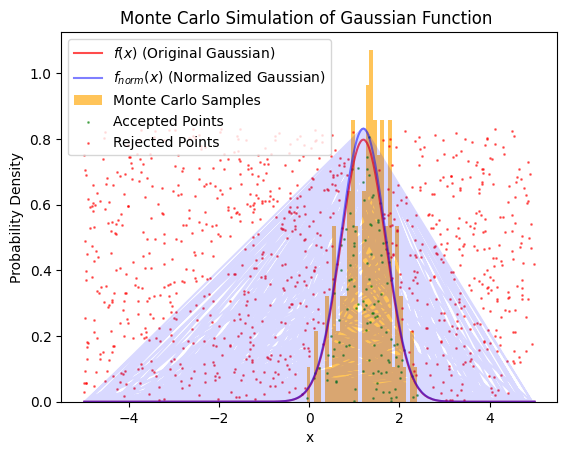

In [20]:
import random
import math
import matplotlib.pyplot as plt

# Parameters for the Gaussian distribution
mu = 1.2  # Mean
sigma = 0.5  # Standard deviation
N = 1000  # Number of samples

# Define the Gaussian function f(x)
def f(x):
    return (1 / (sigma * math.sqrt(2 * math.pi))) * math.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Define the range for x
a, b = -5, 5

# Function for generating random numbers between a specified range
def uniform_random(low, high):
    return random.uniform(low, high)

# Step 2: Calculate the integral (approximate with Monte Carlo integration)
def monte_carlo_integration(func, a, b, num_samples=N):
    sum_f = 0
    for _ in range(num_samples):
        x = uniform_random(a, b)
        sum_f += func(x)
    integral = (b - a) * sum_f / num_samples
    return integral

# Step 3: Normalize the function
integral = monte_carlo_integration(f, a, b)
f_max = max(f(x) / integral for x in [uniform_random(a, b) for _ in range(N)])  # Approximate f_max

def f_normalized(x):
    return f(x) / integral

# Step 4: Monte Carlo sampling using rejection sampling
def monte_carlo_sampling(func_normalized, f_max, a, b, num_samples=N):
    accepted_samples = []
    rejected_samples = []
    for _ in range(num_samples):
        x = uniform_random(a, b)
        y = uniform_random(0, f_max)
        if y <= func_normalized(x):
            accepted_samples.append((x, y))  # Store accepted points
        else:
            rejected_samples.append((x, y))  # Store rejected points
    return accepted_samples, rejected_samples

# Perform the sampling
accepted_samples, rejected_samples = monte_carlo_sampling(f_normalized, f_max, a, b)

# Generate x values for plotting the functions
x_values = [uniform_random(a, b) for _ in range(N)]
x_values.sort()  # Sort x_values for a smoother plot

# Calculate corresponding y values for f(x) and normalized f(x)
y_values_f = [f(x) for x in x_values]  # Original Gaussian function
y_values_f_norm = [f_normalized(x) for x in x_values]  # Normalized Gaussian function

# Plot the original Gaussian function f(x)
plt.plot(x_values, y_values_f, 'r-', label='$f(x)$ (Original Gaussian)', alpha=0.7)

# Plot the normalized Gaussian function
plt.plot(x_values, y_values_f_norm, 'b-', label='$f_{norm}(x)$ (Normalized Gaussian)', alpha=0.5)

# Plot histogram of sampled data to show the Monte Carlo approximation
plt.hist([x for x, _ in accepted_samples], bins=30, density=True, alpha=0.65, color='orange', label='Monte Carlo Samples')

# Plot accepted points (those that fall under the function curve)
accepted_x, accepted_y = zip(*accepted_samples)
plt.scatter(accepted_x, accepted_y, color='green', s=1, label='Accepted Points', alpha=0.5)

# Plot rejected points (those that fall above the function curve)
rejected_x, rejected_y = zip(*rejected_samples)
plt.scatter(rejected_x, rejected_y, color='red', s=1, label='Rejected Points', alpha=0.5)

# Add blue trace lines for the normalized function at random x values to simulate transparency effect
trace_x_values = [uniform_random(a, b) for _ in range(N)]
trace_y_values = [f_normalized(x) for x in trace_x_values]
plt.plot(trace_x_values, trace_y_values, 'b-', alpha=0.15)  # Trace lines with high transparency

# Add labels and legend
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.title("Monte Carlo Simulation of Gaussian Function ")
plt.legend()

plt.show()


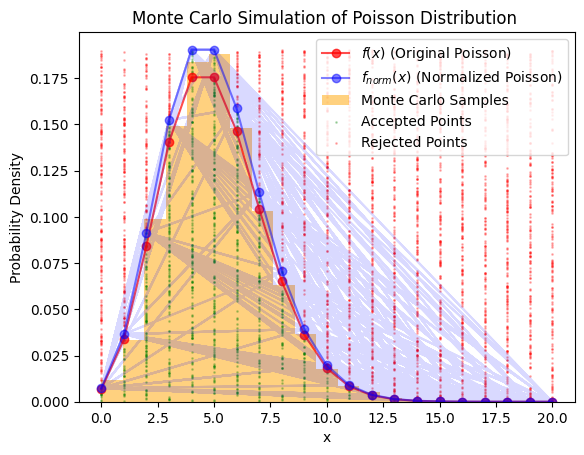

In [18]:
import random
import math
import matplotlib.pyplot as plt

# Parameters for the Poisson distribution
lambda_ = 5  # Mean of the Poisson distribution
N = 1000  # Number of samples

# Define the Poisson distribution function f(x)
def f(x):
    if x < 0:
        return 0
    return (lambda_ ** x) * math.exp(-lambda_) / math.factorial(x)

# Define the range for x (Poisson distribution is defined for non-negative integers)
a, b = 0, 20  # Set a reasonable range for the Poisson distribution

# Step 2: Calculate the integral (approximate with Monte Carlo integration)
def monte_carlo_integration(func, a, b, num_samples=N):
    sum_f = 0
    for _ in range(num_samples):
        x = random.randint(a, b)  # Use random integer for Poisson distribution
        sum_f += func(x)
    integral = (b - a) * sum_f / num_samples
    return integral

# Step 3: Normalize the function
integral = monte_carlo_integration(f, a, b)
f_max = max(f(x) / integral for x in range(a, b + 1))  # Approximate f_max

def f_normalized(x):
    return f(x) / integral

# Step 4: Monte Carlo sampling using rejection sampling
def monte_carlo_sampling(func_normalized, f_max, a, b, num_samples=N):
    accepted_samples = []
    rejected_samples = []
    while len(accepted_samples) < num_samples:
        x = random.randint(a, b)  # Use random integer for Poisson distribution
        y = uniform_random(0, f_max)
        if y <= func_normalized(x):
            accepted_samples.append((x, y))  # Store accepted points
        else:
            rejected_samples.append((x, y))  # Store rejected points
    return accepted_samples, rejected_samples

# Perform the sampling
accepted_samples, rejected_samples = monte_carlo_sampling(f_normalized, f_max, a, b)

# Generate x values for plotting the functions
x_values = range(a, b + 1)

# Calculate corresponding y values for f(x) and normalized f(x)
y_values_f = [f(x) for x in x_values]  # Original Poisson function
y_values_f_norm = [f_normalized(x) for x in x_values]  # Normalized Poisson function

# Plot the original Poisson function f(x)
plt.plot(x_values, y_values_f, 'r-', marker='o', label='$f(x)$ (Original Poisson)', alpha=0.7)

# Plot the normalized Poisson function
plt.plot(x_values, y_values_f_norm, 'b-', marker='o', label='$f_{norm}(x)$ (Normalized Poisson)', alpha=0.5)

# Plot histogram of sampled data to show the Monte Carlo approximation
plt.hist([x for x, _ in accepted_samples], bins=b - a + 1, range=(a, b), density=True, alpha=0.5, color='orange', label='Monte Carlo Samples')

# Plot accepted points (those that fall under the function curve)
accepted_x, accepted_y = zip(*accepted_samples)
plt.scatter(accepted_x, accepted_y, color='green', s=1, label='Accepted Points', alpha=0.25)

# Plot rejected points (those that fall above the function curve)
rejected_x, rejected_y = zip(*rejected_samples)
plt.scatter(rejected_x, rejected_y, color='red', s=1, label='Rejected Points', alpha=0.25)

# Add blue trace lines for the normalized function at random x values to simulate transparency effect
trace_x_values = [random.randint(a, b) for _ in range(N)]
trace_y_values = [f_normalized(x) for x in trace_x_values]
plt.plot(trace_x_values, trace_y_values, 'b-', alpha=0.15)  # Trace lines with high transparency

# Add labels and legend
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.title("Monte Carlo Simulation of Poisson Distribution ")
plt.legend()

plt.show()


# (Extra) Simulating function like |5x+10| 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


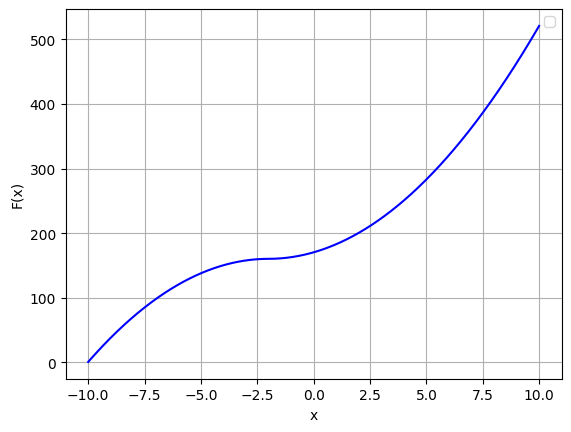

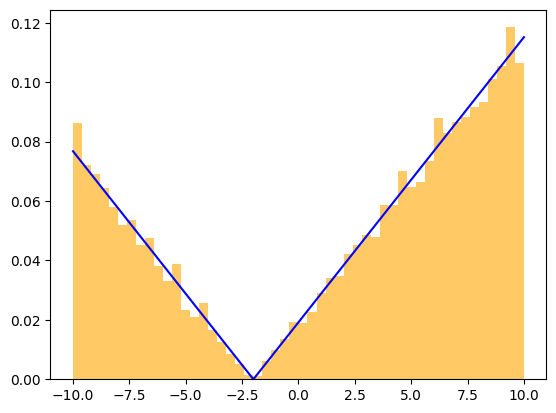

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def pdf(x):
    return np.abs(5*x+10)
x_values = np.linspace(-10,10, 1000)  
dx = x_values[1] - x_values[0]      
pdf_values = pdf(x_values)
cdf_values = []  
cumulative_sum = 0  
for pdf_val in pdf_values:
    cumulative_sum += pdf_val * dx  
    cdf_values.append(cumulative_sum)  


plt.plot(x_values, cdf_values, color='blue')
plt.xlabel("x")
plt.ylabel("F(x)")

plt.legend()
plt.grid(True)
plt.show()
cdf_values = np.array(cdf_values) / cumulative_sum

n_samples = 10000 
random_uniform_samples = np.random.rand(n_samples)


sampled_x_values = np.interp(random_uniform_samples, cdf_values, x_values)


plt.hist(sampled_x_values, bins=50, density=True, alpha=0.6, color='orange', label='Reconstructed PDF')
plt.plot(x_values, pdf_values / np.sum(pdf_values * dx), color='blue', label='Original PDF')
